Ноутбук для защиты поделенный на акты

Использование класса qa_qc_kern в ручном режиме

In [5]:
# Импортируем зависимости
import pandas as pd
import time

# Импортируем классы
from qa_qc_lib.qa_qc_kern import QA_QC_kern

Примеры использования

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость линейная по функции y=a*x+b, при этом a<0

In [6]:
#Верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/Density-PoroOK(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]]
x=df["Density, g/cc"].to_numpy()
y=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(density=x, porosity_open=y,file_path=path)
tests.test_kp_density_dependence()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Зависимость выполняется. Выпадающие точки ([2], [0, 18, 25])
--- 0.13176202774047852 seconds ---


D:\Work\QA_QC_proj\qa_qc_lib\qa_qc_tools\kern_tools.py:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [7]:
#Не верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/Density-PoroFail(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]]
x=df["Density, g/cc"].to_numpy()
y=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(density=x, porosity_open=y,file_path=path)
tests.test_kp_density_dependence()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Зависимость не выполняется. Выпадающие точки ([2], [])
--- 0.09955286979675293 seconds ---


D:\Work\QA_QC_proj\qa_qc_lib\qa_qc_tools\kern_tools.py:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Тест проводится для оценки отсутствия монотонности интервалов долбления.
Т.е., подошва вышележащего интервала долбления должна быть выше или равна кровле нижележащего

In [8]:
#Верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazOK.xlsx")
df=df[["Top","Bottom"]]
x=df["Top"].to_numpy()
y=df["Bottom"].to_numpy()
path="report\\"
tests = QA_QC_kern(top=x, bottom=y, file_path=path)
tests.test_coring_depths_first()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Все данные монотонны
--- 0.029023408889770508 seconds ---


In [9]:
#Не верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazFail.xlsx")
df=df[["Top","Bottom"]]
x=df["Top"].to_numpy()
y=df["Bottom"].to_numpy()
path="report\\"
tests = QA_QC_kern(top=x, bottom=y, file_path=path)
tests.test_coring_depths_first()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     ЗИндексы выпадающие из монотонности [38, 40]
--- 0.02402019500732422 seconds ---


Тест оценивает величину суммарную насыщения водой и нефтью, которая не должна привышать 100% или 1 в долях

In [10]:
#Верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazOK.xlsx")
df=df[["So","Sw"]]
x=df["So"].to_numpy()
y=df["Sw"].to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Все данные корректны
--- 0.02502131462097168 seconds ---


In [ ]:
#Не верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazFail.xlsx")
df=df[["So","Sw"]]
x=df["So"].to_numpy()
y=df["Sw"].to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[1]
--- 0.0647726058959961 seconds ---


Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 47,6]

In [ ]:
#Верные данные
df=pd.read_excel("data/defence_data/kern/SwOK(N).xlsx")
arr=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.test_open_porosity()
tests.generate_test_report()

In [ ]:
#Не верные данные
df=pd.read_excel("data/defence_data/kern/SwFail(N).xlsx")
arr=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.test_open_porosity()
tests.generate_test_report()

Использование класса qa_qc_kern в автоматическом режиме

In [ ]:
# Импортируем классы
from qa_qc_lib.data_preprocessing_kern import DataPreprocessing

In [ ]:
columns_mapping = {
    "Лабораторный номер":["data\\data_1.xlsx->Number"],
    "Карбонатность":["data\\data_1.xlsx->Carbonate"],
    "Кп откр":["data\\data_1.xlsx->Porosity (open)"],
    "Открытая пористость по керосину":["data\\data_1.xlsx->Porosity (kerosine)"],
    "Параметр пористости(F)":["data\\data_2.xlsx->Рп"],
    "Плотность абсолютно сухого образца":["data\\data_1.xlsx->Density, g/cc"],
    "Направление":["data\\data_1.xlsx->Направление"]
}
file_modal = DataPreprocessing()
test=file_modal.process_data(columns_mapping)
print(test)
file_modal.start_tests(test)
file_modal.save_to_excel()

Использование класса qa_qc_cubes в ручном режиме (без коннектора)

In [ ]:
 # Импортируем зависимости
import pandas as pd
import time

# Импортируем классы
from qa_qc_lib.qa_qc_cubes import QA_QC_cubes

Тесты первого порядка

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    open_porosity_file_path="data/grdecl_data/input/Poro.GRDECL.grdecl",
    save_wrong_data_path="report"
)
cubes.test_open_porosity()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    open_perm_x_file_path="data/grdecl_data/input/Perm.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_permeability_permX()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    swl_file_path ="data/grdecl_data/input/Swl.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_range_data_swl()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    save_wrong_data_path="report"
)

cubes.test_right_actnum()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    litatype_file_path="data/grdecl_data/input/litho.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_litatype()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    save_wrong_data_path="report"
)

cubes.test_bulk()
print("--- %s seconds ---" % (time.time() - start_time))

Тесты второго порядка

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    sw_file_path="data/grdecl_data/input/Sw.GRDECL.grdecl",
    #sg_file_path="data/grdecl_data/input/Sg.GRDECL.grdecl",
    so_file_path="data/grdecl_data/input/So.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_sum_cubes()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    swcr_file_path="data/grdecl_data/input/Swcr.GRDECL.grdecl",
    swl_file_path="data/grdecl_data/input/Swl.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_affiliation_swcr()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    sw_file_path="data/grdecl_data/input/Sw.GRDECL.grdecl",
    swl_file_path="data/grdecl_data/input/Swl.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_swl_sw()
print("--- %s seconds ---" % (time.time() - start_time))

Использование класса qa_qc_cubes в ручном режиме (c коннектора)

In [1]:
# Импортируем зависимости
import pandas as pd
import time

# Импортируем классы
from qa_qc_lib.qa_qc_kern import QA_QC_kern
from qa_qc_lib.qa_qc_cubes import QA_QC_cubes

data/grdecl_data/input/Poro.GRDECL.grdecl -> PORO
data/grdecl_data/input/Perm.GRDECL.grdecl -> PERMX
data/grdecl_data/input/litho.GRDECL.grdecl -> LITHOLOGIES
[0.189671 0.195484 0.204387 ... 0.262352 0.246132 0.202596]
[ 54.5646  68.4803  94.5235 ... 420.537  315.477   88.6576]


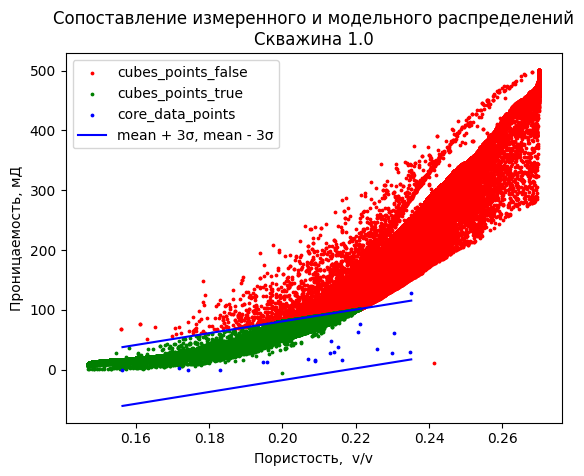

Скважина 1.0 не прошла тест -> Зависимость по кубу не входят в коридор неопределенности
Тест не пройден!!!
--- 21.272801876068115 seconds ---


In [3]:
%matplotlib inline
start_time = time.time()
df = pd.read_excel(
    "data/grdecl_data/test_data_kern-cubes.xlsx",
    sheet_name="Лист2"
)
kpr = df["Кпр_абс"].to_numpy()
kp = df["Кп_откр"].to_numpy()/100
lit = df["Скважина"].to_numpy()
kern = QA_QC_kern(kpr=kpr, porosity_open=kp,lithotype=lit)

cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    qa_qc_kern=kern,
    open_porosity_file_path="data/grdecl_data/input/Poro.GRDECL.grdecl",
    open_perm_x_file_path="data/grdecl_data/input/Perm.GRDECL.grdecl",
    litatype_file_path="data/grdecl_data/input/litho.GRDECL.grdecl"
    )

cubes.test_kern_data_dependence_kpr_kp()
print("--- %s seconds ---" % (time.time() - start_time))